In [ ]:
# 🚗 Car Sales & Company Revenue Analysis Project

# This project analyzes a car sales dataset to uncover insights about customers, dealers, and car companiesb.  
# The main goals are:
# - Understand customer demographics (income, gender, regions).
# - Analyze dealers activity and distribution across regions.
# - Analyze Companies' Total Sales and Revenue 
# - Identify patterns that can help with sales and marketing strategies.
# - Explore car selling trends such as body style, color, engine type, model and manufacturer.

In [ ]:
# ## 📂 Dataset Overview
# The dataset includes:
# - Customer details: Name, Gender, Annual Income.
# - Dealer details: Dealer Name, Dealer No., Dealer Region.
# - Car company details: Company name, Sales, Revenue. 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np 
import seaborn as sns

In [112]:
# Load Dataset 
cars = pd.read_csv("Car Sales.xlsx - car_data.csv") 

# view dataset
cars.head(10)  

,Car_id,Date,Month,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,1,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,"$26,000",06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,1,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,"$19,000",60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,1,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,"$31,500",38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,1,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,"$14,000",99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,1,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,"$24,500",53546-9427,Hatchback,7081483,Janesville
5,C_CND_000006,1/2/2022,1,Guadalupe,Male,850000,Classic Chevy,Mitsubishi,Diamante,Overhead Camshaft,Manual,Pale White,"$12,000",85257-3102,Hatchback,7315216,Scottsdale
6,C_CND_000007,1/2/2022,1,Hailey,Male,1600000,Clay Johnson Auto Sales,Toyota,Corolla,Overhead Camshaft,Manual,Pale White,"$14,000",78758-7841,Passenger,7727879,Austin
7,C_CND_000008,1/2/2022,1,Graham,Male,13500,U-Haul CO,Mitsubishi,Galant,DoubleÂ Overhead Camshaft,Auto,Pale White,"$42,000",78758-7841,Passenger,6206512,Austin
8,C_CND_000009,1/2/2022,1,Naomi,Male,815000,Rabun Used Car Sales,Chevrolet,Malibu,Overhead Camshaft,Manual,Pale White,"$82,000",85257-3102,Hardtop,7194857,Pasco
9,C_CND_000010,1/2/2022,1,Grayson,Female,13500,Rabun Used Car Sales,Ford,Escort,DoubleÂ Overhead Camshaft,Auto,Pale White,"$15,000",85257-3102,Passenger,7836892,Scottsdale


In [6]:
# Understand the structure of the dataset 
print(cars.info())
print("-------------------")
print(cars.describe()) 
print("-------------------")
print(cars.nunique()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Month          23906 non-null  int64 
 3   Customer Name  23905 non-null  object
 4   Gender         23906 non-null  object
 5   Annual Income  23906 non-null  int64 
 6   Dealer_Name    23906 non-null  object
 7   Company        23906 non-null  object
 8   Model          23906 non-null  object
 9   Engine         23906 non-null  object
 10  Transmission   23906 non-null  object
 11  Color          23906 non-null  object
 12  Price ($)      23906 non-null  object
 13  Dealer_No      23906 non-null  object
 14  Body Style     23906 non-null  object
 15  Phone          23906 non-null  int64 
 16  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(14)
memory usage: 3.1+ MB
None
------------------

(22806, 17)


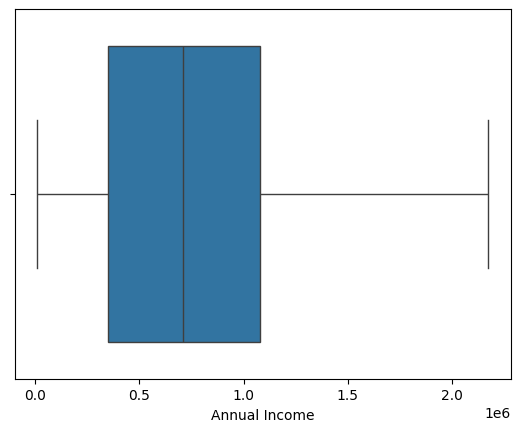

In [142]:
# Checking for Outliers in Annual Income 

# sns.boxplot(x=cars["Annual Income"])   # Their are outliers 
# plt.show()

# Removing Outliers in cars dataset 
q1 = cars['Annual Income'].quantile(0.25) 
q3 = cars['Annual Income'].quantile(0.75)
iqr = q3 - q1 

lowerBounds = q1 - 1.5*iqr 
upperBounds = q3 + 1.5*iqr 

cars = cars[(cars['Annual Income'] >= lowerBounds) & (cars['Annual Income'] <= upperBounds)] 
print(cars.shape)

sns.boxplot(x=cars["Annual Income"])   # outliers removed
plt.show()

In [134]:
remaining_outliers = cars[
    (cars['Annual Income'] < lowerBounds) | 
    (cars['Annual Income'] > upperBounds)
]

print(f"Number of remaining outliers: {len(remaining_outliers)}")

Number of remaining outliers: 0


In [136]:
# Data Cleaning 
# [1] Drop NA's: 
cars.isna().sum()
cars.dropna(inplace= True) 

# [2] Remove Duplicates: 
cars.duplicated().sum() # No duplicates 

np.int64(0)

In [36]:
cars.dtypes

Car_id           object
Date             object
Month             int64
Customer Name    object
Gender           object
Annual Income     int64
Dealer_Name      object
Company          object
Model            object
Engine           object
Transmission     object
Color            object
Price ($)        object
Dealer_No        object
Body Style       object
Phone             int64
Dealer_Region    object
dtype: object

In [138]:
# Fixing Some DataTypes
# [1] Convert Date column from object datatype to datetime
cars['Date'] = pd.to_datetime(cars['Date'], errors= 'coerce') 

# [2] Clean Price column like removing $ and , and convert it to float 
cars['Price ($)'] = cars['Price ($)'].replace(r'[\$,]', '', regex= True).astype(float) 

print(cars.info()) 

<class 'pandas.core.frame.DataFrame'>
Index: 22806 entries, 0 to 23905
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_id         22806 non-null  object        
 1   Date           22806 non-null  datetime64[ns]
 2   Month          22806 non-null  int64         
 3   Customer Name  22806 non-null  object        
 4   Gender         22806 non-null  object        
 5   Annual Income  22806 non-null  int64         
 6   Dealer_Name    22806 non-null  object        
 7   Company        22806 non-null  object        
 8   Model          22806 non-null  object        
 9   Engine         22806 non-null  object        
 10  Transmission   22806 non-null  object        
 11  Color          22806 non-null  object        
 12  Price ($)      22806 non-null  float64       
 13  Dealer_No      22806 non-null  object        
 14  Body Style     22806 non-null  object        
 15  Phone          22806 non

In [140]:
# Understand dataset structure after cleaning 
cars.shape

(22806, 17)

In [52]:
# Key metrics summary
print(" KEY BUSINESS METRICS ")
print(f"Total Sales: {len(cars):,}")
print(f"Total Revenue: ${cars['Price ($)'].sum():,.2f}")
print(f"Average Sale Price: ${cars['Price ($)'].mean():,.2f}")
print(f"Highest Price: ${cars['Price ($)'].max():,.2f}")
print(f"Lowest Price: ${cars['Price ($)'].min():,.2f}")
print(f"Average Customer Income: ${cars['Annual Income'].mean():,.2f}")
print(f"Number of Dealers: {cars['Dealer_Name'].nunique()}")

 KEY BUSINESS METRICS 
Total Sales: 22,806
Total Revenue: $639,641,664.00
Average Sale Price: $28,047.08
Highest Sale: $85,800.00
Lowest Sale: $1,200.00
Average Customer Income: $730,858.81
Number of Dealers: 28


In [62]:
CompanyCount = cars['Company'].value_counts()
print(CompanyCount)

Company
Chevrolet     1755
Dodge         1590
Ford          1543
Volkswagen    1260
Mercedes-B    1225
Mitsubishi    1216
Chrysler      1062
Oldsmobile    1056
Toyota        1041
Nissan         839
Mercury        831
Lexus          773
Pontiac        766
Volvo          757
BMW            751
Honda          687
Acura          664
Cadillac       614
Plymouth       590
Saturn         561
Lincoln        476
Audi           449
Buick          419
Subaru         389
Jeep           346
Porsche        343
Hyundai        245
Saab           200
Infiniti       183
Jaguar         175
Name: count, dtype: int64


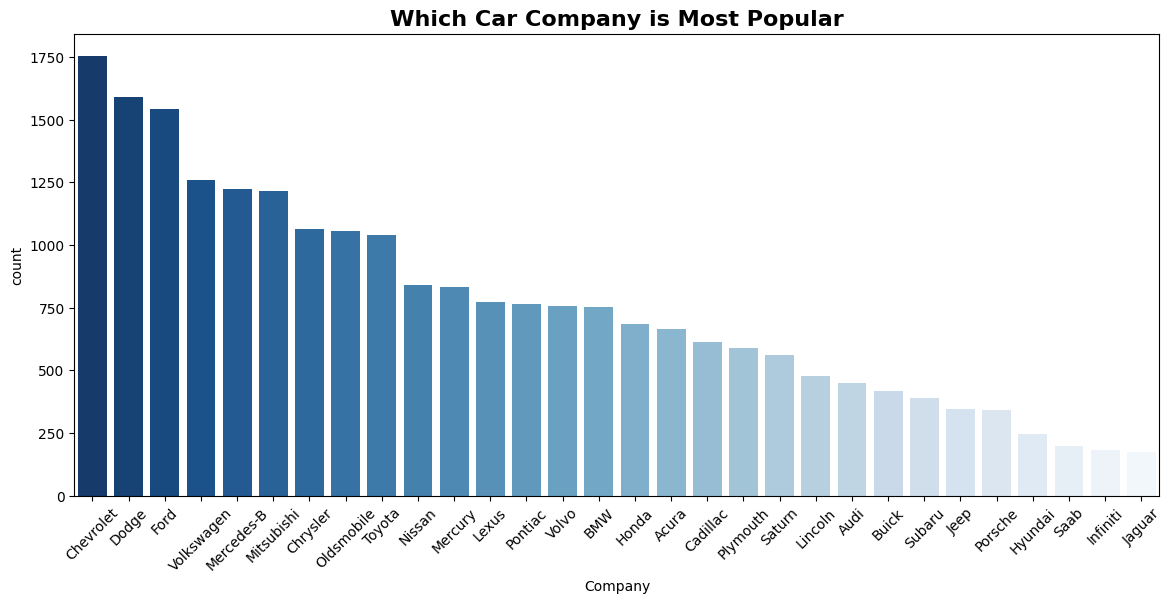

In [66]:
CompanyCount = cars['Company'].value_counts().index 
# print(CompanyCount) 

colors = sns.color_palette("Blues_r", len(CompanyCount)) 

plt.figure(figsize=(14,6))
sns.countplot(
    data= cars,
    x= "Company",
    order= CompanyCount,
    hue= "Company",          # required to be future-proof
    hue_order= CompanyCount,        # make hue follow the same order as x
    palette= colors,         # gradient aligns with order
    dodge= False,            # keep one bar per category
    legend= False
)

plt.title("Which Car Company is Most Popular", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


Company
Chevrolet     45918744.0
Ford          45059313.0
Dodge         41749977.0
Oldsmobile    33559413.0
Mercedes-B    33029850.0
Mitsubishi    32337249.0
Volkswagen    32223761.0
Toyota        30729344.0
Chrysler      27443106.0
Lexus         26288091.0
Cadillac      25363895.0
Mercury       23472219.0
Nissan        22634379.0
Pontiac       22410600.0
Volvo         21050992.0
Honda         19267233.0
BMW           18846480.0
Plymouth      17485466.0
Saturn        17415963.0
Acura         16483740.0
Lincoln       14870059.0
Buick         14103531.0
Subaru        10856989.0
Audi          10267633.0
Porsche        7756628.0
Saab           7308177.0
Jeep           7174961.0
Infiniti       5373036.0
Hyundai        4734961.0
Jaguar         4425874.0
Name: Price ($), dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_12168\2105631294.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Company',


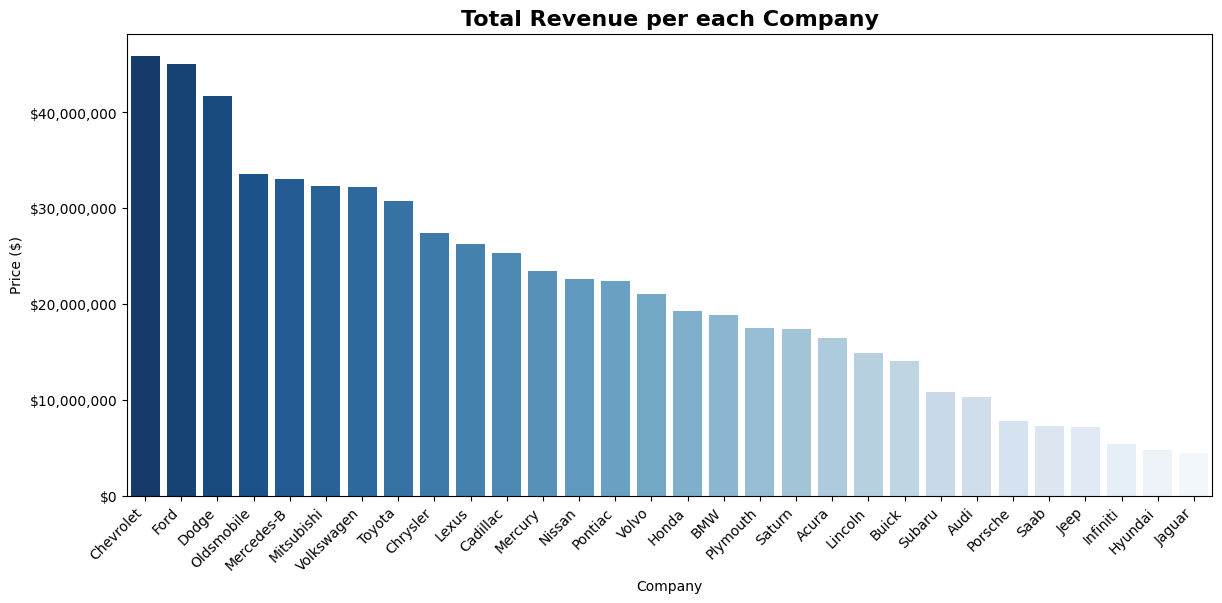

In [68]:
# Which Company has the highest Revenue
companyTotalSales = cars.groupby('Company')['Price ($)'].sum().sort_values(ascending= False)  
print(companyTotalSales)

companyTotalSales = pd.DataFrame(companyTotalSales) 
plt.figure(figsize=(14, 6))
sns.barplot(x='Company', 
            y= 'Price ($)', 
            data=companyTotalSales, 
            palette= colors)

# Format y-axis with dollar sign and commas
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.xticks(rotation= 45, ha= 'right')
plt.title("Total Revenue per each Company", fontsize=16, fontweight='bold')
plt.show()

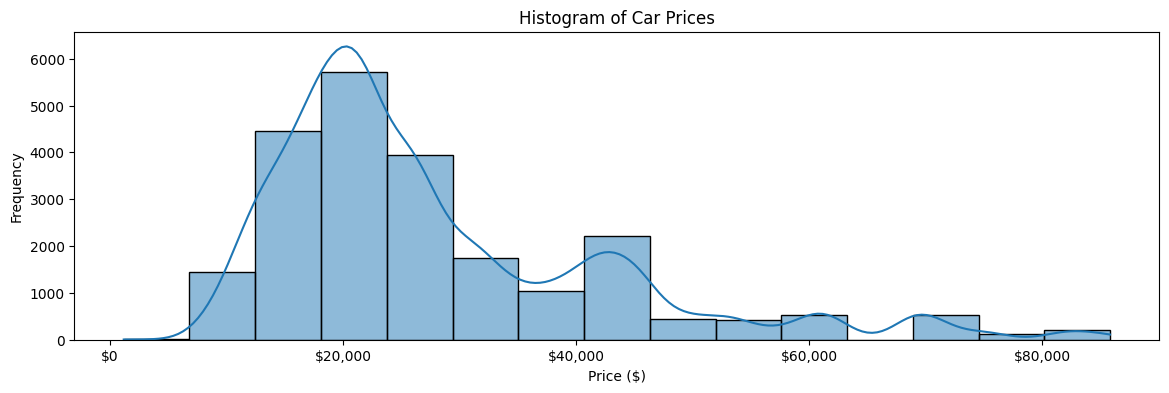

In [84]:
# Univariate analysis 
# Analyze numeric column using histgrams 
plt.figure(figsize=(14, 4))  # width=10, height=6 inches
sns.histplot(cars['Price ($)'], kde=True, bins= 15)
plt.title('Histogram of Car Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.show()

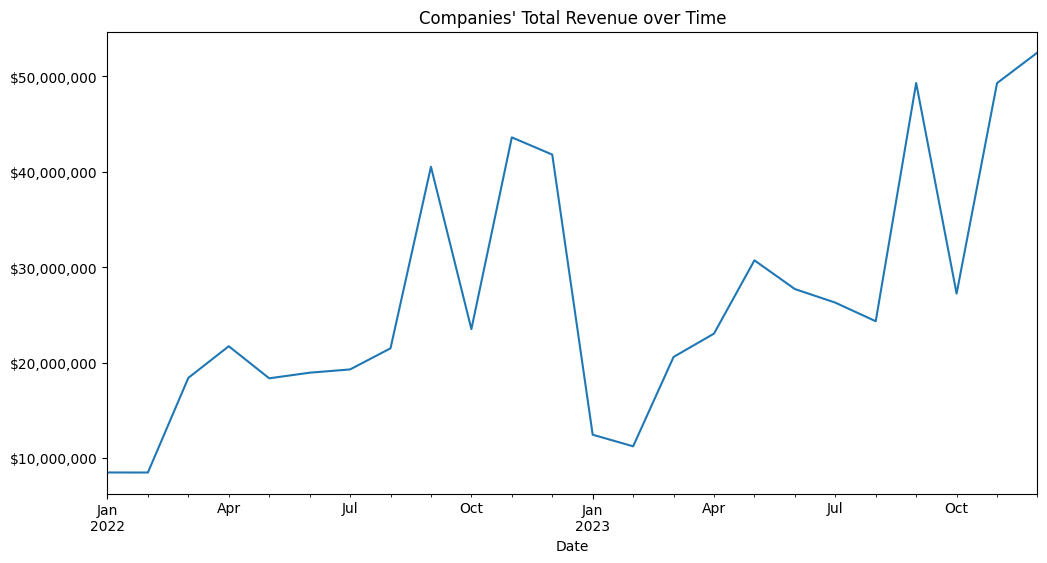

In [74]:
# Time based analysis 
salesOverTime = cars.groupby(cars['Date'].dt.to_period('M'))['Price ($)'].sum() 
# print(salesOverTime) 
plt.figure(figsize=(12, 6))
salesOverTime.plot(kind= 'line')
plt.title("Companies' Total Revenue over Time")
# Format y-axis with dollar sign and commas
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.show() 

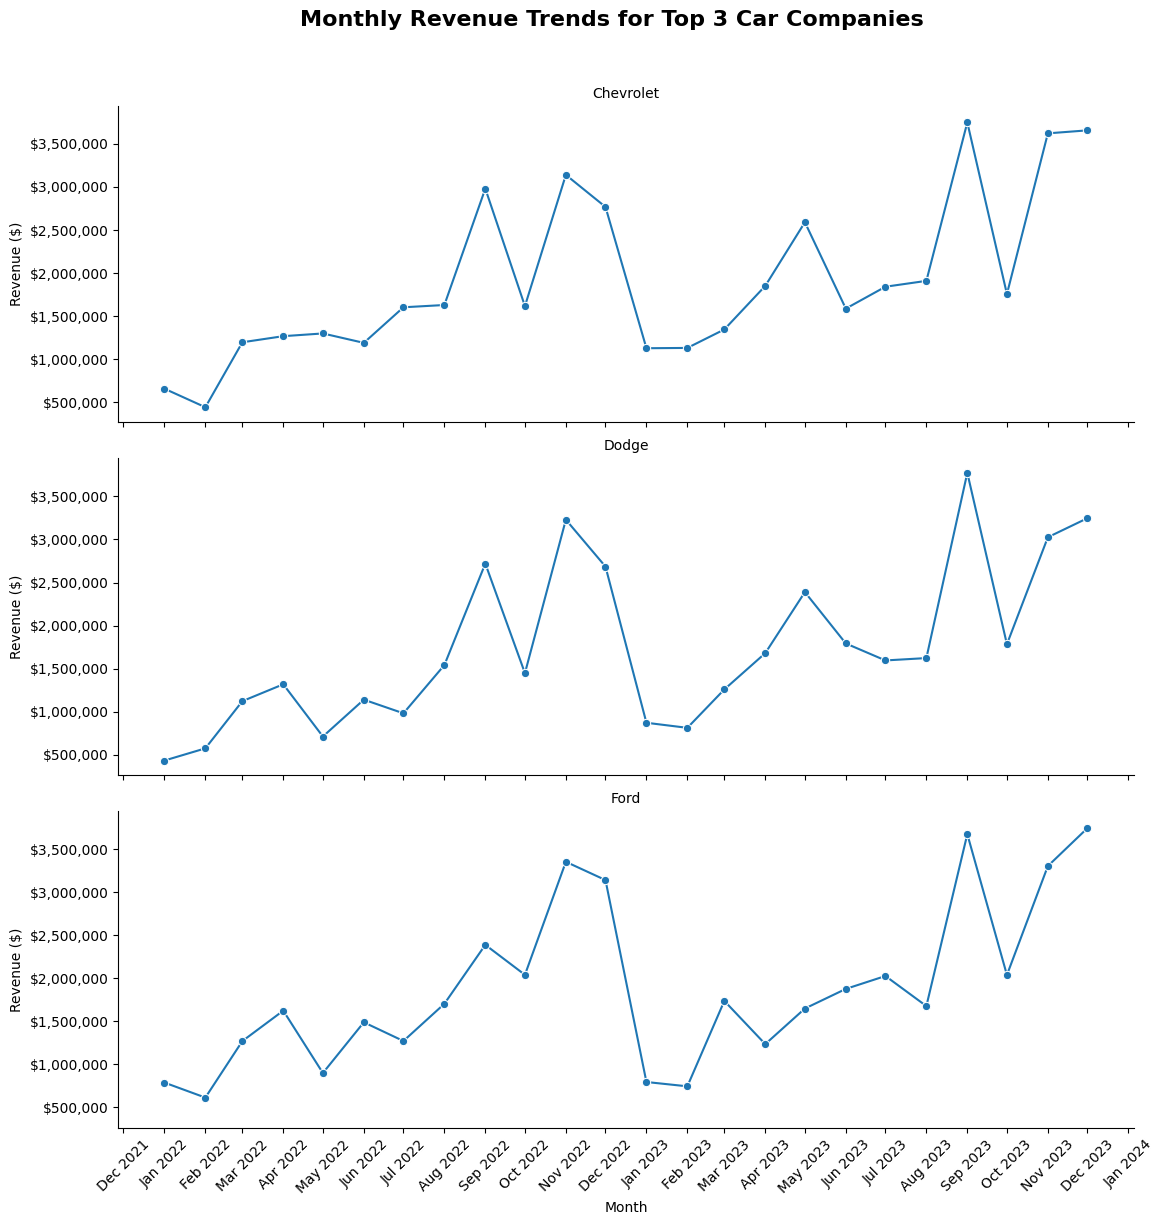

In [78]:
import matplotlib.dates as mdates

# Convert Date
cars['Date'] = pd.to_datetime(cars['Date'])
cars['YearMonth'] = cars['Date'].dt.to_period('M').dt.to_timestamp()

# Top 3 companies by total revenue
top_companies = (
    cars.groupby('Company')['Price ($)']
    .sum()
    .sort_values(ascending=False)
    .head(3)
    .index
)

# print(top_companies)

# Filter dataset to only top companies
cars_top = cars[cars['Company'].isin(top_companies)]

# Aggregate revenue per month per company
monthly_revenue = (
    cars_top.groupby(['YearMonth','Company'])['Price ($)']
    .sum()
    .reset_index()
)

g = sns.relplot(
    data=monthly_revenue,
    x="YearMonth",
    y="Price ($)",
    kind="line",
    col="Company",
    col_wrap=1,       # wrap into multiple rows
    height=4,
    aspect=2.8,
    marker="o"
)

g.set_titles("{col_name}", fontweight='light')
g.set_axis_labels("Month", "Revenue ($)")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Monthly Revenue Trends for Top 3 Car Companies", fontsize=16, fontweight='bold')
# Formatting the y axis to has $ and , 
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))  # 2,000,000

# Format x-axis as short month names
for ax in g.axes.flat:
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # diplay every month
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # e.g., Jan 2022, Feb 2022
    ax.tick_params(axis='x', rotation=45)  # rotate to avoid overlap
plt.show()

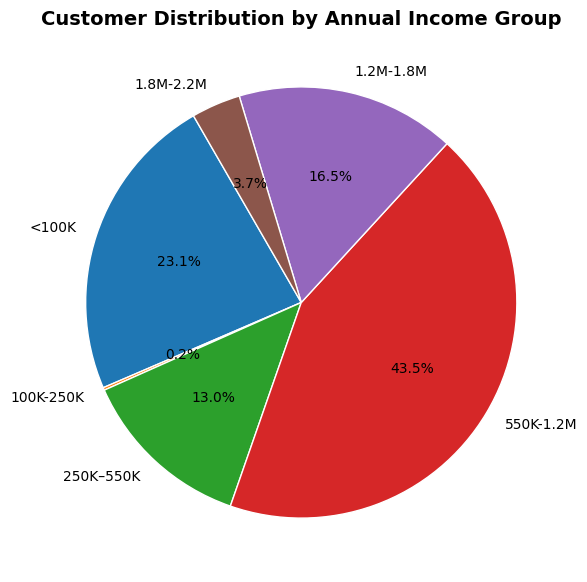

In [82]:
# print(cars['Annual Income'].sort_values(ascending= True))

# cars.head() 

# print(cars['Annual Income'].max()) 
# print(cars['Annual Income'].min())  

# Grouping Annual income 
IncomeGroups = [0, 100000, 250000, 550000, 1200000, 1800000, cars['Annual Income'].max()]
IncomeLabels = ["<100K", "100K-250K", "250K–550K", "550K-1.2M", "1.2M-1.8M", "1.8M-2.2M"]
cars["Income Group"] = pd.cut(cars["Annual Income"], 
                              bins= IncomeGroups,
                              labels= IncomeLabels,
                              include_lowest= True) 

incomeCounts = cars["Income Group"].value_counts().sort_index() 

plt.figure(figsize=(7,7))
plt.pie(incomeCounts, 
        labels= incomeCounts.index,
        autopct='%1.1f%%',
        startangle= 120,
        wedgeprops={'edgecolor': 'white'})
plt.title("Customer Distribution by Annual Income Group",fontweight= "bold", fontsize= 14)
plt.show()

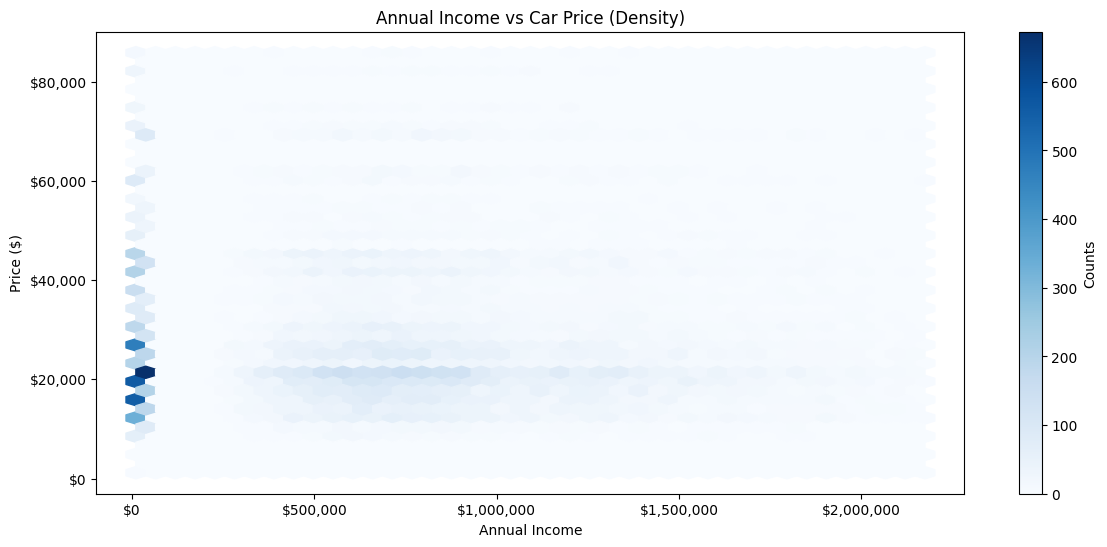

In [75]:
plt.figure(figsize=(14, 6))
plt.hexbin(cars['Annual Income'], cars['Price ($)'], gridsize=40, cmap="Blues")
plt.colorbar(label="Counts")
plt.xlabel("Annual Income")
plt.ylabel("Price ($)")
plt.title("Annual Income vs Car Price (Density)")
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.show()


# Most customers have annual incomes below $1,000,000 and tend to purchase cars priced between $0–$40,000, 
# indicating this is the company’s primary market segment.

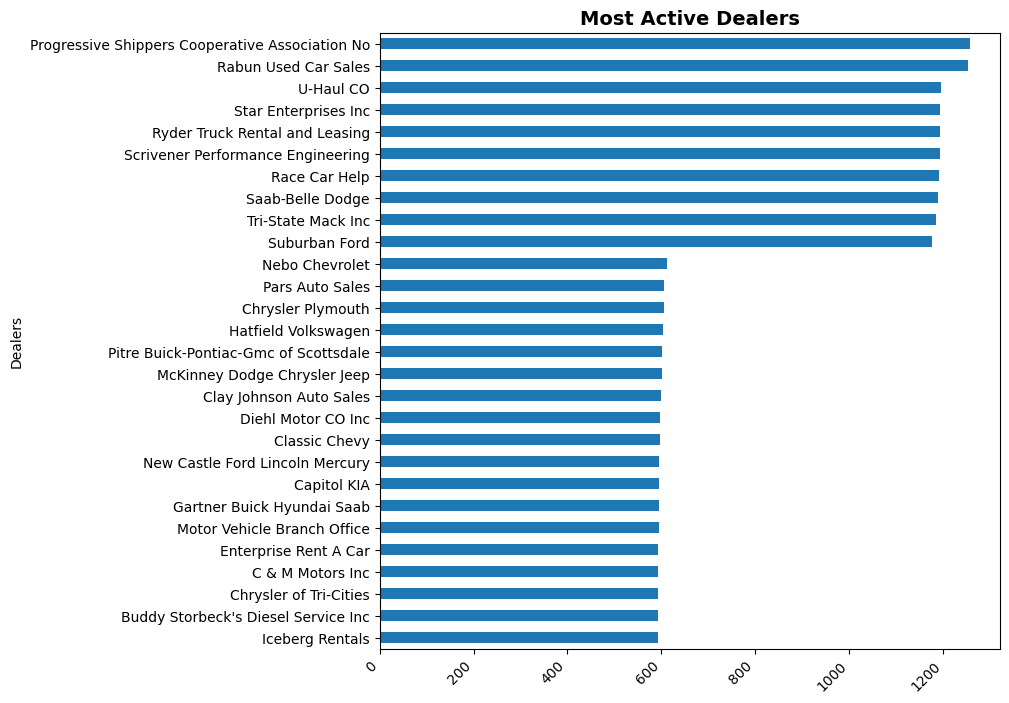

In [144]:
Dealer_NameCount = cars['Dealer_Name'].value_counts().sort_values() 
# print(Dealer_NameCount) 

# print(cars['Dealer_No '].nunique()) 


Dealer_NameCount.plot(kind= 'barh', figsize= (8, 8)) 
plt.title("Most Active Dealers", fontsize=14, fontweight='bold')
plt.ylabel('Dealers')
plt.xticks(rotation= 45, ha= 'right')
plt.show() 

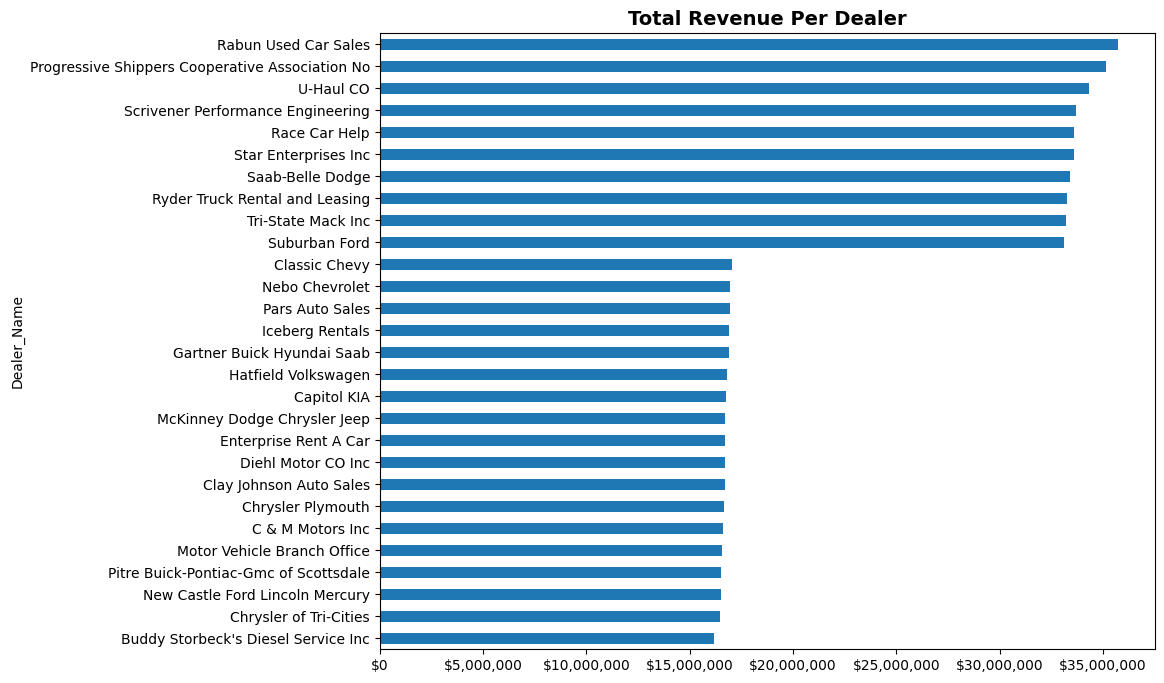

In [104]:
# total Revenue per dealer 
dealerRevenue = cars.groupby("Dealer_Name")['Price ($)'].sum().sort_values() 

dealerRevenue.plot(kind= "barh", figsize= (10, 8))
plt.title("Total Revenue Per Dealer", fontsize= 14, fontweight= "bold")
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
# plt.xticks(rotation= 45) 
plt.show()

Model
Diamante      398
Jetta         366
Passat        365
Prizm         393
Silhouette    395
Name: count, dtype: int64


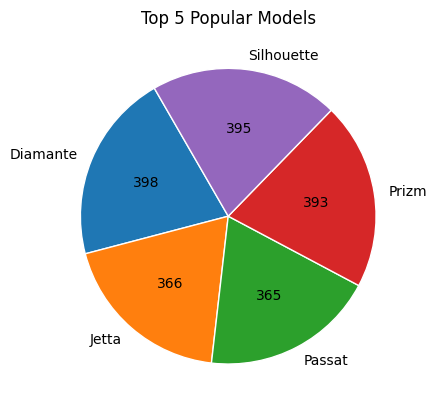

In [106]:
ModelTop5 = cars['Model'].value_counts().head(5).sort_index()   
print(ModelTop5)


plt.pie(ModelTop5, 
        labels= ModelTop5.index,
        autopct=lambda pct: f"{int(round(pct/100.*np.sum(ModelTop5)))}",  # show only count
        startangle= 120,
        wedgeprops={'edgecolor': 'white'})
plt.title("Top 5 Popular Models")
plt.show()

Engine
DoubleÂ Overhead Camshaft    11970
Overhead Camshaft            10836
Name: count, dtype: int64


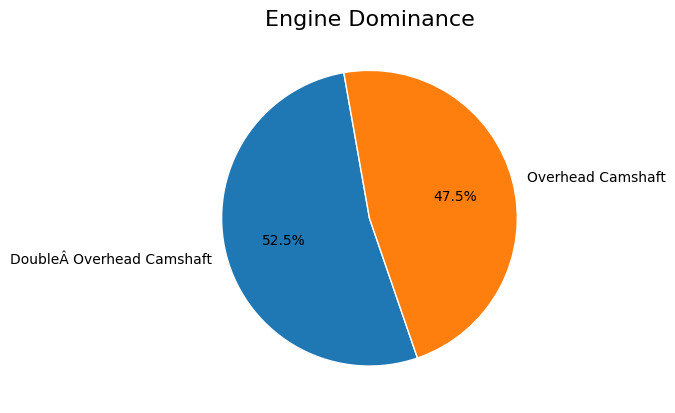

In [105]:
EngineCount = cars['Engine'].value_counts().sort_index()
print(EngineCount)   # can be visualized by pie chart

plt.pie(EngineCount, 
        labels= EngineCount.index, 
        autopct='%1.1f%%',
        startangle= 100,
        wedgeprops={'edgecolor': 'white'})

plt.title("Engine Dominance", fontsize= 16)
plt.show()

Body Style
Hardtop      2839
Hatchback    5850
Passenger    3761
SUV          6075
Sedan        4281
Name: count, dtype: int64


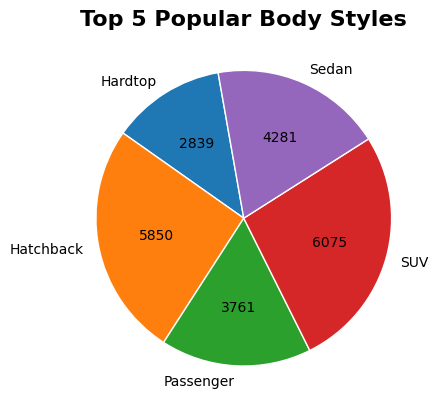

In [103]:
BodyStyleCount = cars['Body Style'].value_counts().sort_index()
print(BodyStyleCount)    # can be visualized by pie chart, count plot or column chart 


plt.pie(BodyStyleCount, 
        labels= BodyStyleCount.index, 
        autopct=lambda pct: f"{int(round(pct/100.*np.sum(BodyStyleCount)))}",  # show only count
        startangle= 100,
        wedgeprops={'edgecolor': 'white'}) 

plt.title("Top 5 Popular Body Styles", fontsize= 16, fontweight= "bold")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_13732\1741685511.py:6: UserWarning: The palette list has more values (30) than needed (7), which may not be intended.
  sns.countplot(


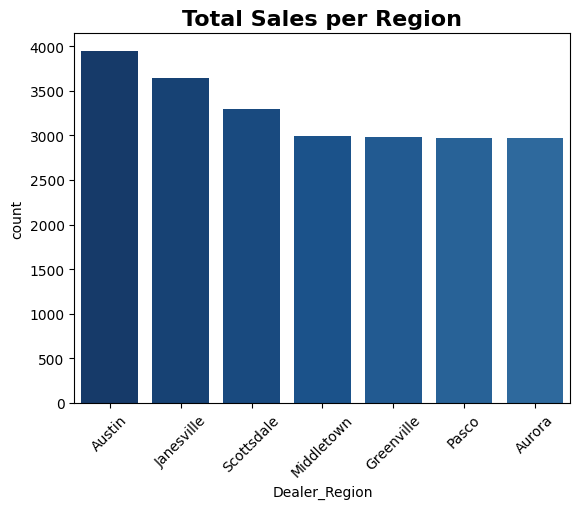

In [101]:
Dealer_RegionCount = cars['Dealer_Region'].value_counts().index
# print(Dealer_RegionCount)    # can be visualized by pie chart, count plot or column chart 

colors2 = sns.color_palette("viridis_r", len(Dealer_RegionCount))

sns.countplot(
    data= cars,
    x= "Dealer_Region",
    order= Dealer_RegionCount,
    hue= "Dealer_Region",          # required to be future-proof
    hue_order= Dealer_RegionCount,        # make hue follow the same order as x
    palette= colors,         # gradient aligns with order
    dodge= False,            # keep one bar per category
    legend= False
)

plt.title("Total Sales per Region", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

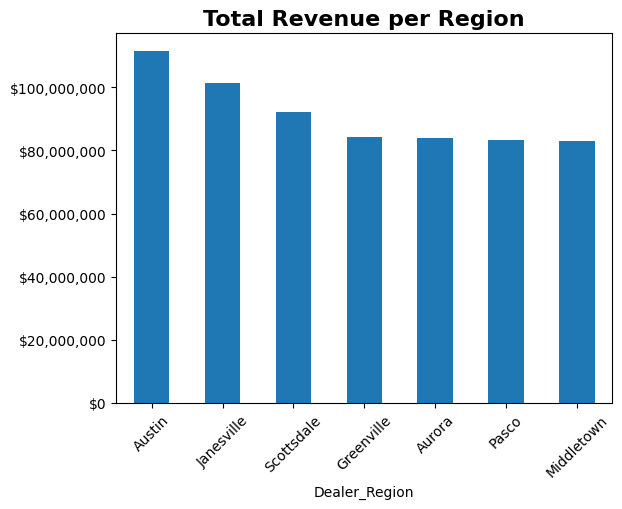

In [117]:
DealerRegionRevenue = cars.groupby('Dealer_Region')['Price ($)'].sum().sort_values(ascending= False) 
# print(DealerRegionRevenue)

DealerRegionRevenue.plot(kind= "bar") 
plt.title("Total Revenue per Region", fontsize= 16, fontweight= "bold")
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.xticks(rotation=45)
plt.show()